# Fussing about with a first grid run in 2018 (v2)
    v2 Working on the unigrid

In [28]:
%matplotlib notebook

In [26]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from astropy.table import Table

## Load up a file

In [33]:
exmpl_file = '../../HydroSims/wind_sim_tabular_unigrid.dat'

In [34]:
wind_sim = Table.read(exmpl_file, format='ascii')

In [35]:
len(wind_sim)

1000000

In [36]:
wind_sim[0:5]

x,y,z,n_gas,vel_x,vel_y,vel_z,vel_disp,logT,n_star
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-19.8000000023,-19.7999999963,-19.7999999955,1.81889675708e-06,-1017.56225167,-161.028037708,-617.264208398,650.604074237,7.23252099782,42.7741295049
-19.8000000023,-19.7999999963,-19.3999999955,1.95862660131e-06,-948.862639431,-129.113538542,-573.568002269,621.84784379,7.19325570617,0.0
-19.8000000023,-19.7999999963,-18.9999999955,2.24291911343e-06,-872.937997606,-93.7692533596,-541.153992914,590.192432322,7.14787471361,0.0
-19.8000000023,-19.7999999963,-18.5999999955,2.57341014013e-06,-802.142055691,-63.8387927887,-517.368711905,557.582393022,7.09850554347,0.0
-19.8000000023,-19.7999999963,-18.1999999955,2.9386554329e-06,-743.952916242,-40.9233617553,-499.152745044,527.669061324,7.05061070271,0.0


In [42]:
np.max(wind_sim['n_star'][1:])

0.0

## Examine a bit

In [7]:
np.max(wind_sim['n_star'])

42.774129504915237

In [8]:
np.sum(wind_sim['n_star'])

42.774129504915237

## Cut on cold gas

In [43]:
cold_cells = wind_sim['logT'] < 5.
np.sum(cold_cells)

318843

In [45]:
wind_sim['n_gas'][~cold_cells] = 0.

In [46]:
wind_sim[0:5]

x,y,z,n_gas,vel_x,vel_y,vel_z,vel_disp,logT,n_star
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-19.8000000023,-19.7999999963,-19.7999999955,0.0,-1017.56225167,-161.028037708,-617.264208398,650.604074237,7.23252099782,42.7741295049
-19.8000000023,-19.7999999963,-19.3999999955,0.0,-948.862639431,-129.113538542,-573.568002269,621.84784379,7.19325570617,0.0
-19.8000000023,-19.7999999963,-18.9999999955,0.0,-872.937997606,-93.7692533596,-541.153992914,590.192432322,7.14787471361,0.0
-19.8000000023,-19.7999999963,-18.5999999955,0.0,-802.142055691,-63.8387927887,-517.368711905,557.582393022,7.09850554347,0.0
-19.8000000023,-19.7999999963,-18.1999999955,0.0,-743.952916242,-40.9233617553,-499.152745044,527.669061324,7.05061070271,0.0


## Write-out the entries needed and in the required order

In [13]:
new_wind_sim = wind_sim[['n_gas', 'vel_x', 'vel_y', 'vel_z', 'n_star', 'vel_disp']]

In [14]:
new_wind_sim.write('../../HydroSims/wind_sim_input2.ascii', format='ascii', overwrite=True)

### I then stripped the first line with vi

## Compile the code

### Copied all the code into FirstRun/

### Need mpicxx on profx
    sudo apt-get install libcr-dev mpich

### Need liblua and its source code
    https://www.lua.org/download.html
    make linux
    make test

## Running
    Edit the param.lua file

## Check the output

In [15]:
nlam = 240
nx = 100
ny = 100
lam0 = 2.77e3
dlam = 2.5e-1
dx = 0.4 # kpc

In [16]:
spec_tbl = Table.read('../../HydroSims/FirstRun/spec_fuss.ascii', format='ascii')

In [17]:
spec_tbl[0:5]

col1,col2
float64,float64
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0


### Build spectrum

In [23]:
flux = np.zeros(nlam)

In [24]:
for kk in range(nlam):
    tmp = np.roll(counts,kk)[::100*100]
    flux[kk] = np.sum(tmp)

In [27]:
wave = lam0 + dlam*np.arange(nlam)

### Plot

<IPython.core.display.Javascript object>


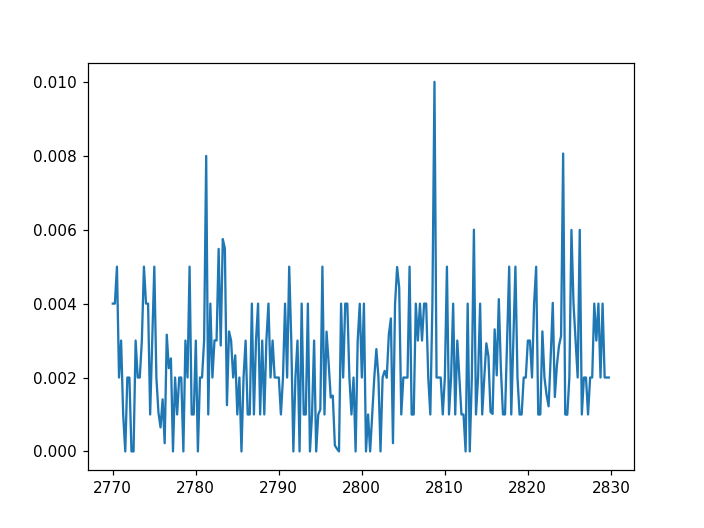

In [29]:
plt.clf()
ax = plt.gca()
ax.plot(wave, flux)
plt.show()

In [20]:
tmp = counts[::100*100]

In [21]:
tmp.size

240

In [22]:
tmp

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.001     ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00099993,  0.        ,  0.  